In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd

data_folder = '../data/'

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import distance
import seaborn as sns

sns.set(font_scale=1.5)

data = '../data/'
figures = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Load the datasets

In [3]:
df1 = pd.read_csv(data_folder + 'GEV_SM/swissmetro.dat', sep='\t')
df2 = pd.read_csv(data_folder + 'Optima/optima.dat', sep='\t')
df3 = pd.read_csv(data_folder + 'LondonTravel/12_13_14.csv')
df4 = pd.read_csv(data_folder + 'AirlineItinerary/airline.dat', sep='\t')
df5 = pd.read_csv(data_folder + 'Netherlands/netherlands.dat', sep='\t')
df6 = pd.read_csv(data_folder + 'Parking/parking.dat', sep='\t')
df7 = pd.read_csv(data_folder + 'Telephone/telephone.dat', sep='\t')

df1_ml = pd.read_csv(data_folder + 'Iris/iris.data', names=['1', '2', '3', '4', 'label'])
df2_ml = pd.read_csv(data_folder + 'BikeSharing/train_bike_sharing.csv')
df3_ml = pd.read_csv(data_folder + 'MNIST/train.dat', sep=' ', header=None)

In [4]:
df1_ml = df1_ml.drop(columns='label')
df5 = df5.dropna()

In [5]:
df3 = df3.sample(20000)
df3_ml = df3_ml.sample(10000)

In [9]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df1_ml, df2_ml, df3_ml]
labels = ['Swissmetro', 'Optima', 'LondonTravel', 'Airline \nItinerary', 'Mode Choice \nNetherlands', 'Parking \nSpain', 'Telephone', 'Iris (ML)', 'Bike Sharing (ML)', 'MNIST (ML)']

In [7]:
dists = []

for i in range(len(dfs)):
    print("{}: {}".format(i+1, labels[i]))
    # Transform df in matrix
    x = np.matrix(dfs[i])
    
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    tmp = distance.cdist(x, x, 'correlation')
    iu2 = np.triu_indices(len(x), 1)
    dists.append(tmp[iu2]/len(dfs[i].columns))

1: Swissmetro


/home/gael/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gael/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


2: Optima
3: LondonTravel
4: Airline Itinerary
5: Mode Choice 
Netherlands
6: Parking in Spain
7: Telephone
8: Iris (ML)
9: Bike Sharing (ML)
10: MNIST (ML)


Text(0, 0.5, 'Correlation')

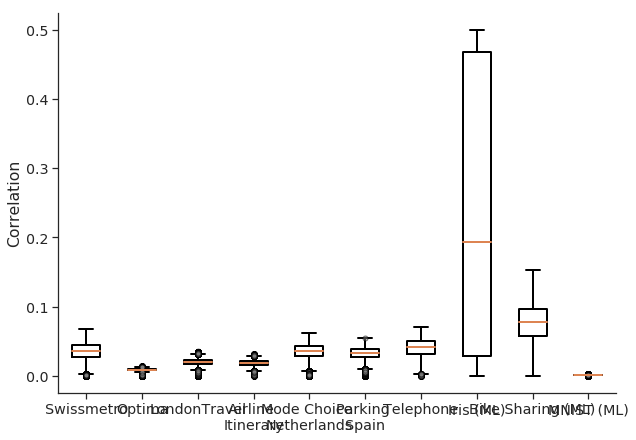

In [10]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

flierprops = dict(markerfacecolor='grey', markersize=5, alpha=0.5, linestyle='none')

bp = plt.boxplot(dists, flierprops=flierprops)

for box in bp['boxes']:
    # change outline color
    box.set(linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(linewidth=2)


plt.xticks(np.array(range(1, len(labels)+1)), labels)
#plt.grid()
plt.ylabel('Correlation')
#plt.savefig(figures + 'corr.pdf', bbox_inches='tight')
#plt.savefig(figures + 'corr.png', bbox_inches='tight')